### Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). It assumes a linear relationship between the variables, meaning the change in the dependent variable is proportional to the change in the independent variable(s).

#### Key Concepts:
1. **Simple Linear Regression**: Involves one independent variable and one dependent variable. The relationship is modeled as:

    y = β₀ + β₁x + ε

    where:
    - y is the dependent variable,
    - x is the independent variable,
    - β₀ is the intercept,
    - β₁ is the slope,
    - ε is the error term.

2. **Multiple Linear Regression**: Involves multiple independent variables. The relationship is modeled as:

    y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

    where:
    - y is the dependent variable,
    - x₁, x₂, ..., xₙ are the independent variables,
    - β₀ is the intercept,
    - β₁, β₂, ..., βₙ are the coefficients,
    - ε is the error term.

Linear regression is widely used in predictive modeling and is the foundation for many machine learning algorithms.

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Data preprocessing

# Load data

In [3]:
df = pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
print("Missing values: ", df.isnull().sum())

Missing values:  price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
# Binary encoding 
binary_columns = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
]

for col in binary_columns:
    df[col] = df[col].map({"yes": 1, "no": 0})

df     

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


# Checking Outliers

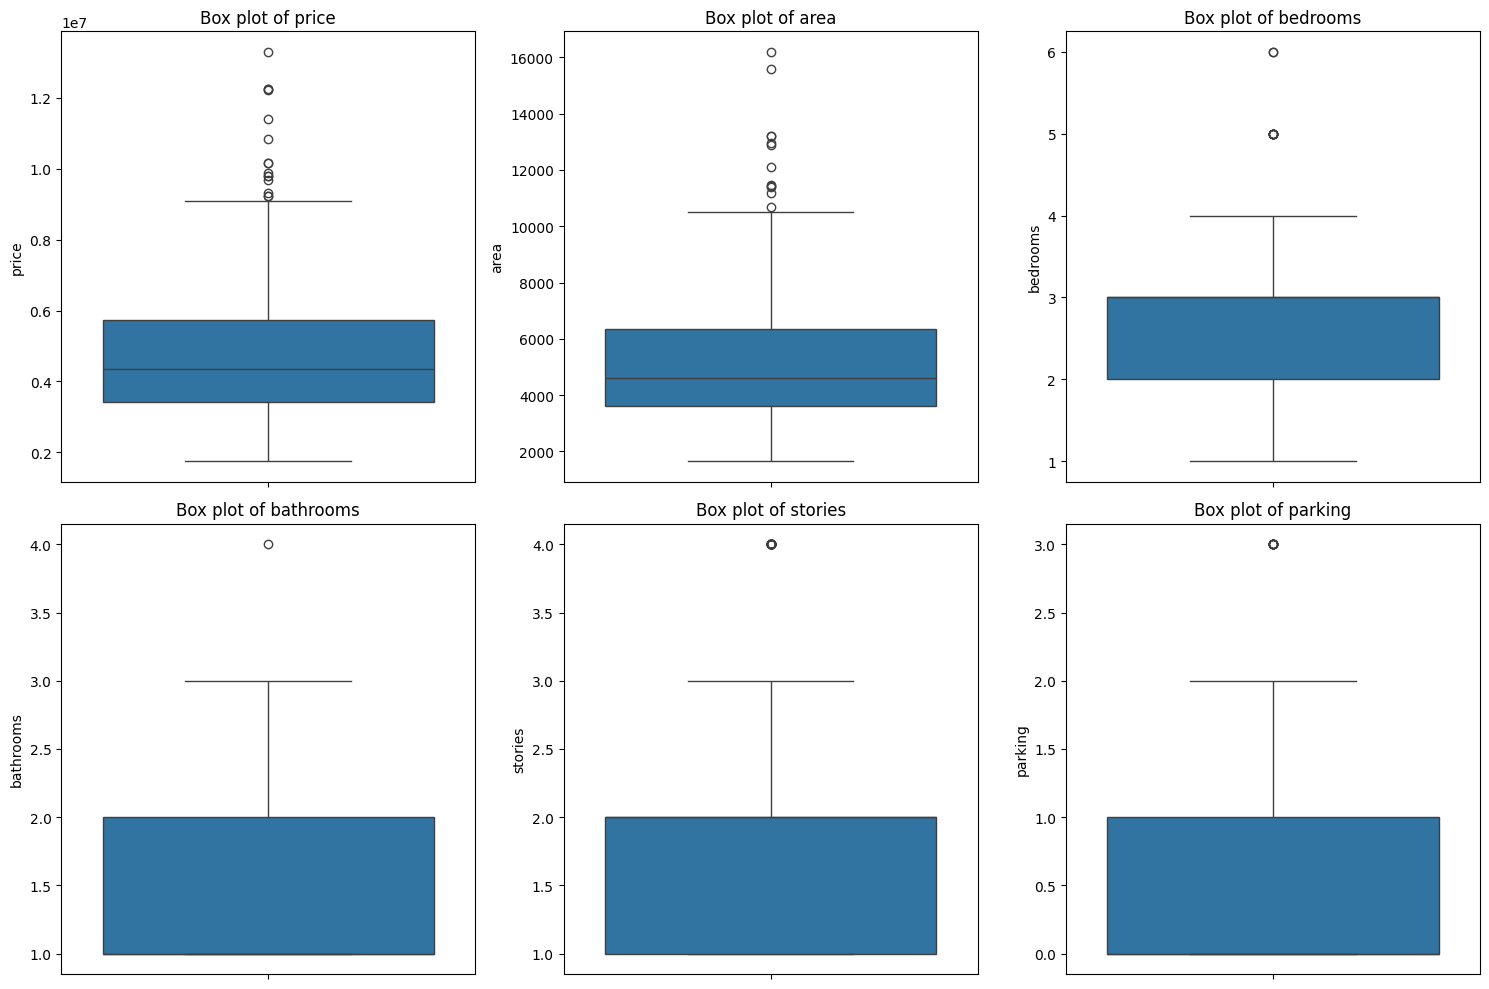

In [6]:
# List of numerical columns to check for outliers
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Set the figure size for the plots
plt.figure(figsize=(15, 10))

# Loop through each numerical column to create box plots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each column
    sns.boxplot(y=df[col])  # Generate a box plot for the column
    plt.title(f"Box plot of {col}")  # Set the title for the subplot

# Adjust layout to prevent overlap and save the figure
plt.tight_layout()
plt.savefig('Housing-Outliers.png')  # Save the plot as an image
plt.show()  # Display the plots

In [7]:
# List of numerical columns to remove outliers
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Calculate the first quartile (Q1) and third quartile (Q3) for the numerical columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter the dataframe to remove rows with outliers
# Outliers are defined as values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the updated dataframe after removing outliers
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [8]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


# Prepare data to feed the model

In [ ]:
# Separate the features (X) and the target variable (y)
X = df.drop("price", axis=1)  # Drop the 'price' column to use the rest as features
y = df["price"]  # Use the 'price' column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 20% of the data is used for testing
)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Scale the training data (fit and transform)
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing data (transform only, using the same scaler as used during train)
X_test_scaled = scaler.transform(X_test)


# Train the model

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
# Predict the target variable for the training dataset using the trained model
y_train_pred = model.predict(X_train_scaled)

# Predict the target variable for the testing dataset using the trained model
y_test_pred = model.predict(X_test_scaled)

In [12]:
# Calculate the Root Mean Squared Error (RMSE) for training and testing datasets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE for training data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE for testing data

# Calculate the R-squared (R2) score for training and testing datasets
train_r2 = r2_score(y_train, y_train_pred)  # R2 score for training data
test_r2 = r2_score(y_test, y_test_pred)  # R2 score for testing data

# Print the model's performance metrics
print("\nModel Performance: ")
print(f"Training RMSE: {train_rmse:.2f}")  # Display training RMSE
print(f"Testing RMSE: {test_rmse:.2f}")  # Display testing RMSE
print(f"Training R2 Score: {train_r2:.2f}")  # Display training R2 score
print(f"Testing R2 Score: {test_r2:.2f}")  # Display testing R2 score


Model Performance: 
Training RMSE: 879887.20
Testing RMSE: 1006243.63
Training R2 Score: 0.62
Testing R2 Score: 0.61


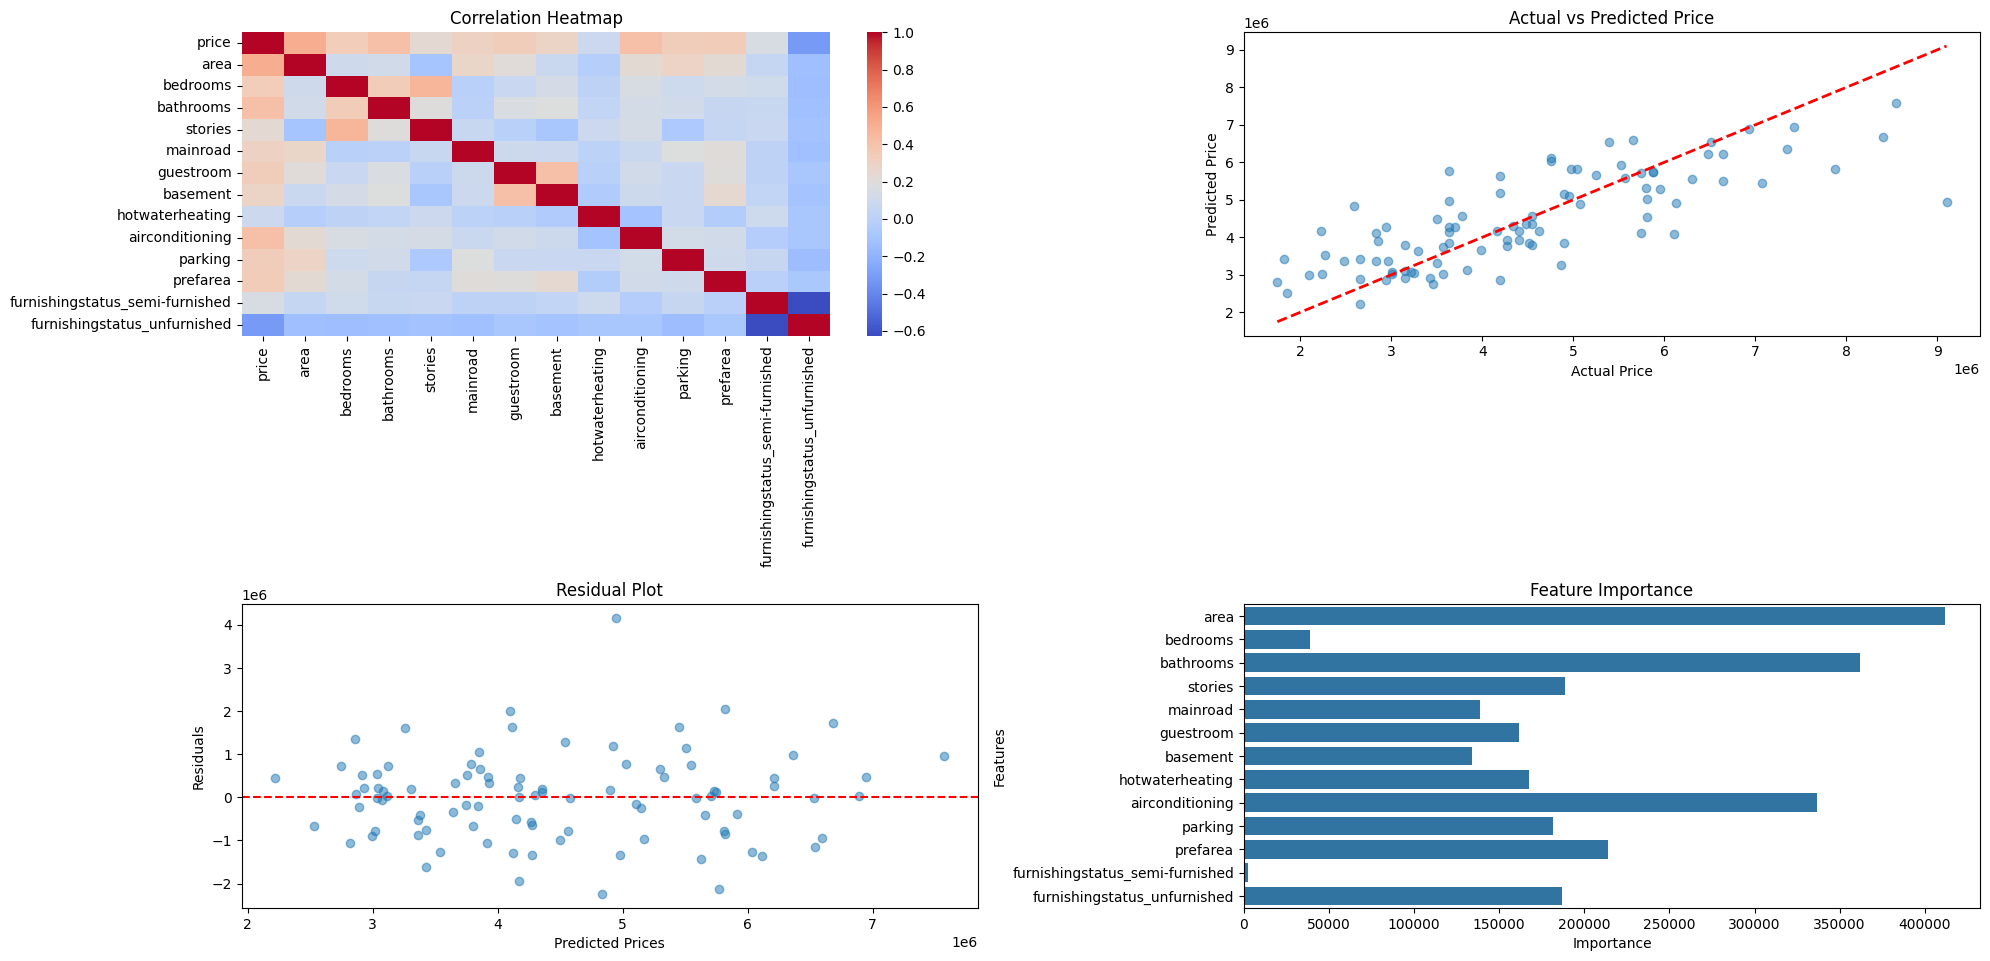

In [15]:
plt.figure(figsize=(20, 15))


# Correlation heatmap
correlation_matrix = df.corr()
plt.subplot(3, 2, 1)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Scatter plot: Actual vs Predicted
plt.subplot(3, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')

# Residual scatter plot: Residuals vs Predicted
plt.subplot(3, 2, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Feature Importance
plt.subplot(3, 2, 4)
feature_importance = abs(model.coef_)
feature_columns = df.drop("price", axis=1).columns  # Exclude the target column
sns.barplot(x=feature_importance, y=feature_columns)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.tight_layout()
plt.savefig('House_regression_plots.png')
plt.show()